<a href="https://colab.research.google.com/github/tanishka234/Netflix-Data-Analysis/blob/main/netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()
df.isnull().sum()  # check for missing values

# Drop rows or fill missing values (optional cleanup)
df.dropna(subset=['country', 'director'], inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Text(0.5, 1.0, 'Count of Movies vs TV Shows')

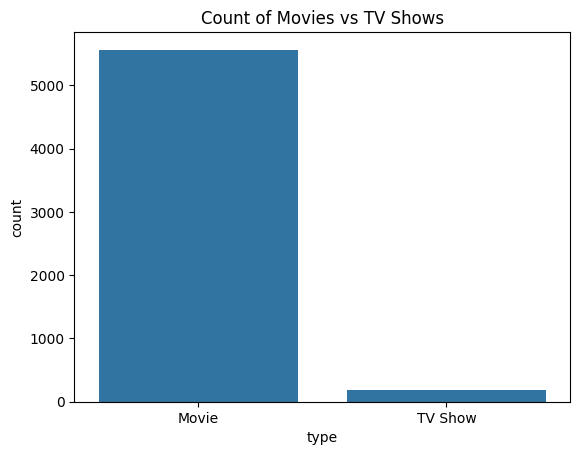

In [6]:
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows')


Text(0.5, 1.0, 'Top 10 Genres')

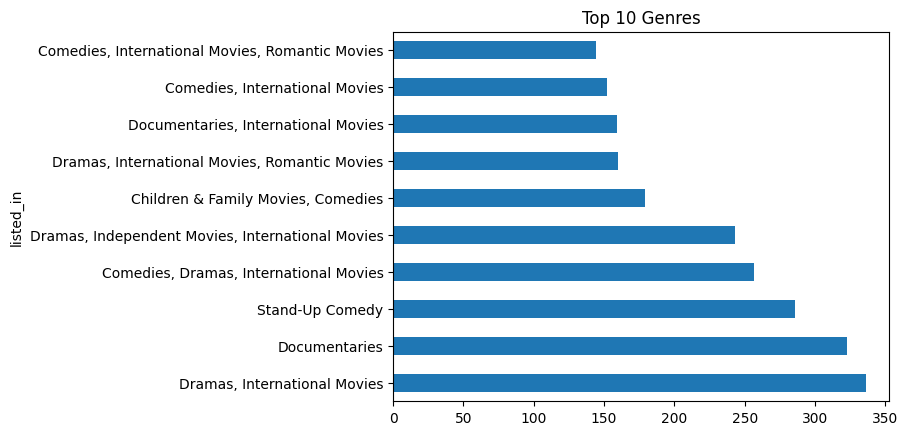

In [7]:
df['listed_in'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Genres')


Text(0.5, 1.0, 'Top Countries Producing Netflix Content')

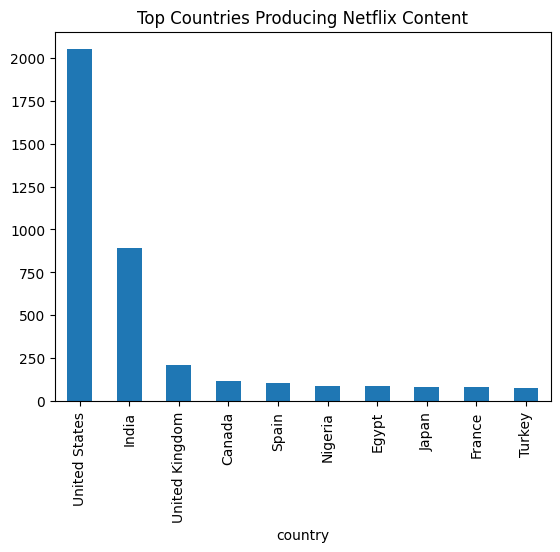

In [8]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top Countries Producing Netflix Content')


/tmp/ipython-input-11-450567769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_added'] = df['date_added'].dt.year


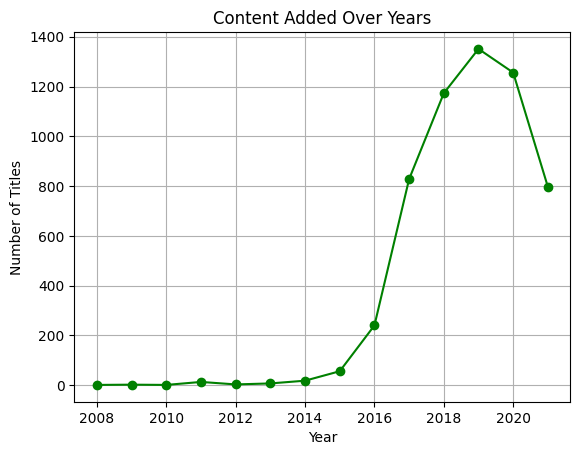

In [11]:
# Convert 'date_added' to datetime (handle errors)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows with missing dates if needed
df = df.dropna(subset=['date_added'])

# Extract year from the date
df['year_added'] = df['date_added'].dt.year

# Count titles per year and plot
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()



/tmp/ipython-input-12-2309944730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration'] = df_movie['duration'].str.replace(' min','').astype(float)


Text(0.5, 1.0, 'Movie Duration Distribution')

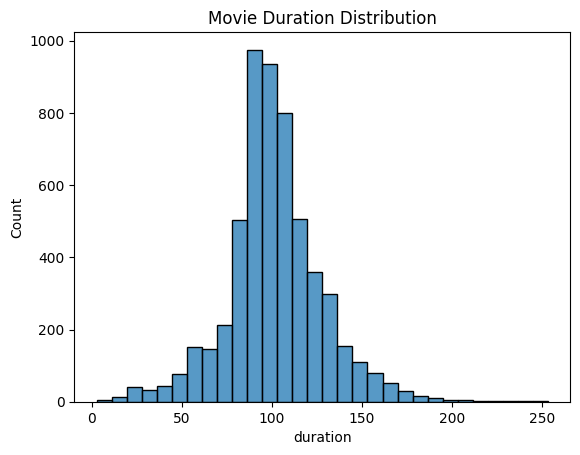

In [12]:
df_movie = df[df['type'] == 'Movie']
df_movie['duration'] = df_movie['duration'].str.replace(' min','').astype(float)
sns.histplot(df_movie['duration'], bins=30)
plt.title('Movie Duration Distribution')


# ***#Key Insights from Netflix Data Analysis***

🔺 **Movies vs TV Shows:**

Netflix has a higher number of Movies compared to TV Shows. Approximately 70% of the titles are Movies, while TV Shows make up the remaining 30%.

🎭 **Popular Genres:**

The most common genre on Netflix is Drama, followed by Comedy, Documentary, and Action. These genres appear frequently across both movies and TV shows.

🌍 **Top Content-Producing Countries:**

USA is the leading country contributing content to Netflix.

India is the second-most common, followed by the UK and Canada.

This indicates a strong focus on both Western and South Asian markets.

🕒 **Movie Duration:**

Most Netflix movies fall in the 90–100 minute range.

A few short films and very long movies exist, but the majority stick to this standard format.

📈 **Content Addition Over Time:**

The number of titles added increased significantly from 2016 to 2019, peaking in 2019.

There was a slight dip in 2020–2021, possibly due to production delays during the COVID-19 pandemic.

🧑‍💼**Director & Actor Frequency:**

Rajiv Chilaka (Indian animation director) appears frequently.

Most cast and directors are not repeated often—suggesting a wide range of contributors across titles.

📝 **Conclusion:**

Netflix has rapidly expanded its content library, prioritizing diverse genres and global reach. With strong representation from the USA and India, the platform balances both international blockbusters and regional storytelling.

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

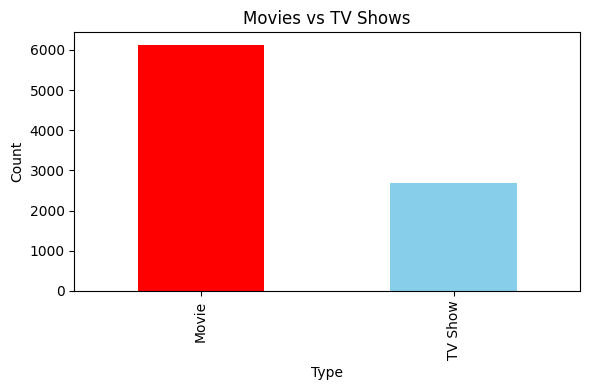

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
df = pd.read_csv('netflix_titles.csv')

# Print the first 5 rows and column names to verify
print(df.head())
print("🟡 Available columns:", df.columns)

# Create the Movies vs TV Shows chart
type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 4))
type_counts.plot(kind='bar', color=['red', 'skyblue'])
plt.title('Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()

# Save the chart as PNG
plt.savefig('chart1_movies_vs_tv.png')
plt.show()


/tmp/ipython-input-15-1230832054.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_data.values, y=genre_data.index, palette='viridis')


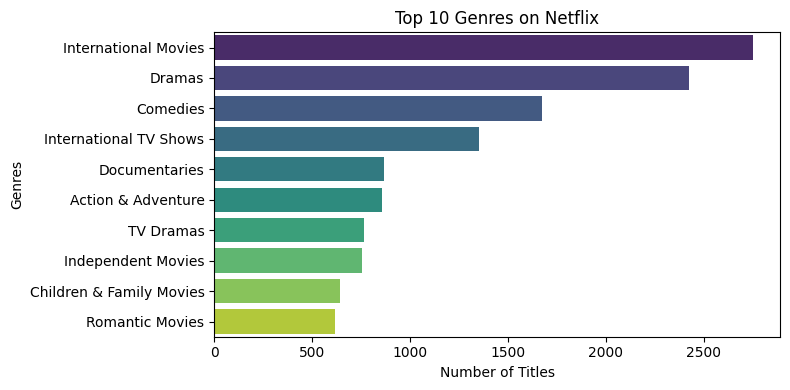

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset if not already loaded
df = pd.read_csv('netflix_titles.csv')

# Split genres and count top 10
genre_data = df['listed_in'].dropna().str.split(', ', expand=True).stack().value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_data.values, y=genre_data.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.tight_layout()

# Save the chart
plt.savefig('chart2_genre_distribution.png')
plt.show()
